In [ ]:
import networkx as nx
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import osmnx as ox

## REQUISITO 1

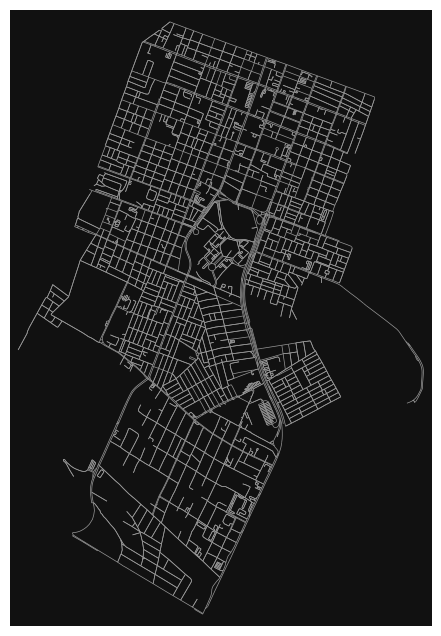

In [3]:
places = ["Lagoa Nova, Natal, Rio Grande do Norte, Brasil",
          "Candelária, Natal, Rio Grande do Norte, Brasil",
          "Mirassol, Natal, Rio Grande do Norte, Brasil"]

G = ox.graph_from_place(places, network_type="bike")
remove = ox.graph_from_place("Universidade Federal do Rio Grande do Norte", network_type="bike")
G.remove_nodes_from(list(remove.nodes()))
G.remove_edges_from(list(remove.edges()))

fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)
plt.savefig('./imgs/surrounding.png', transparent=True,dpi=600)
plt.show()

In [22]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"O número de nós em G é: {num_nodes}")
print(f"O número de arestas em G é: {num_edges}")

O número de nós em G é: 2914
O número de arestas em G é: 6915


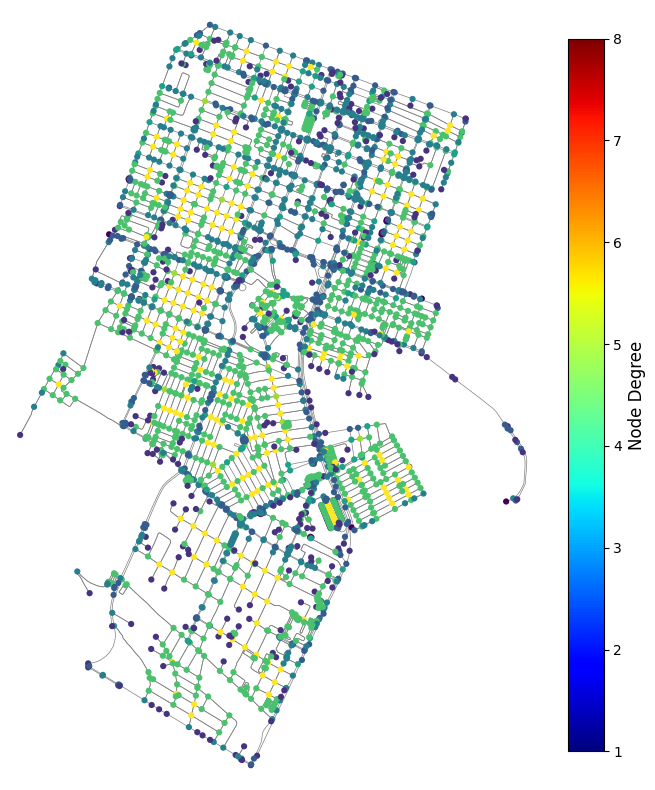

In [ ]:
degree_dict = dict(G.degree())
node_colors = [degree_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label('Node Degree', fontsize=12)

plt.savefig('./imgs/degree_centrality.png', transparent=True,dpi=600)
plt.show()

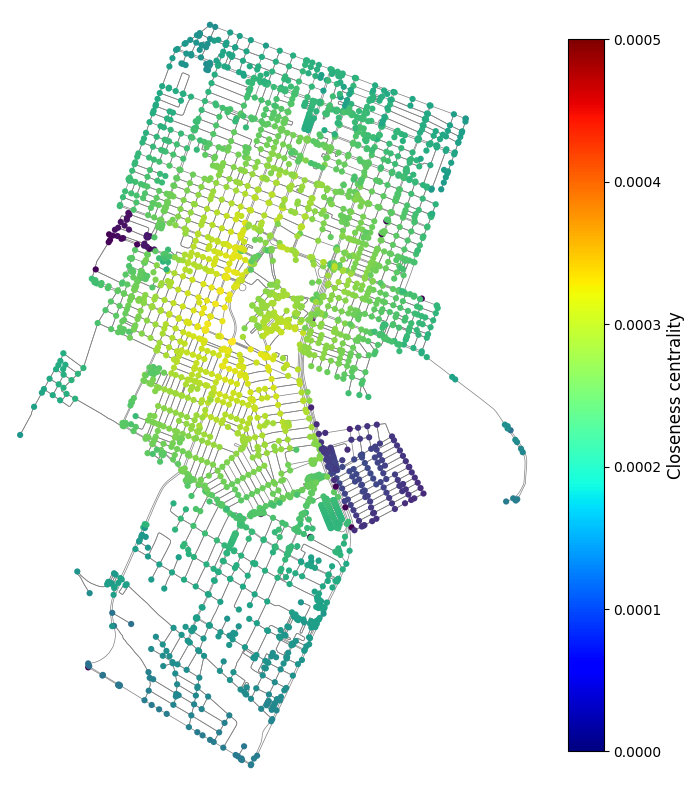

In [ ]:
closeness_dict = nx.closeness_centrality(G, distance='length')
node_colors = [closeness_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de proximidade
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label('Closeness centrality', fontsize=12)

plt.savefig('./imgs/closeness_centrality.png', transparent=True,dpi=600)
plt.show()

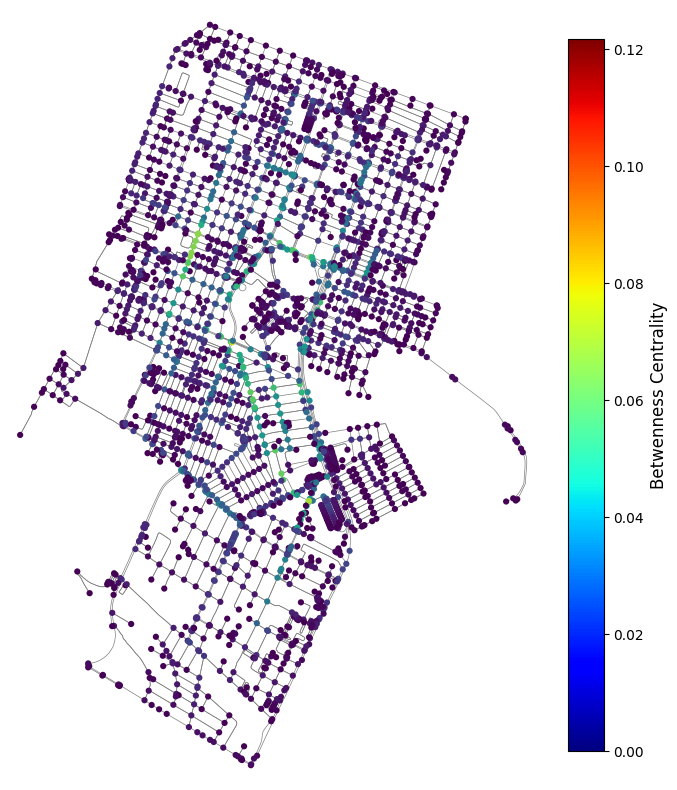

In [16]:
betweenness_dict = nx.betweenness_centrality(G, weight='length', normalized=True)
node_colors = [betweenness_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de intermediação
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label('Betwenness Centrality', fontsize=12)

plt.savefig('./imgs/betwenness_centrality.png', transparent=True,dpi=600)
plt.show()

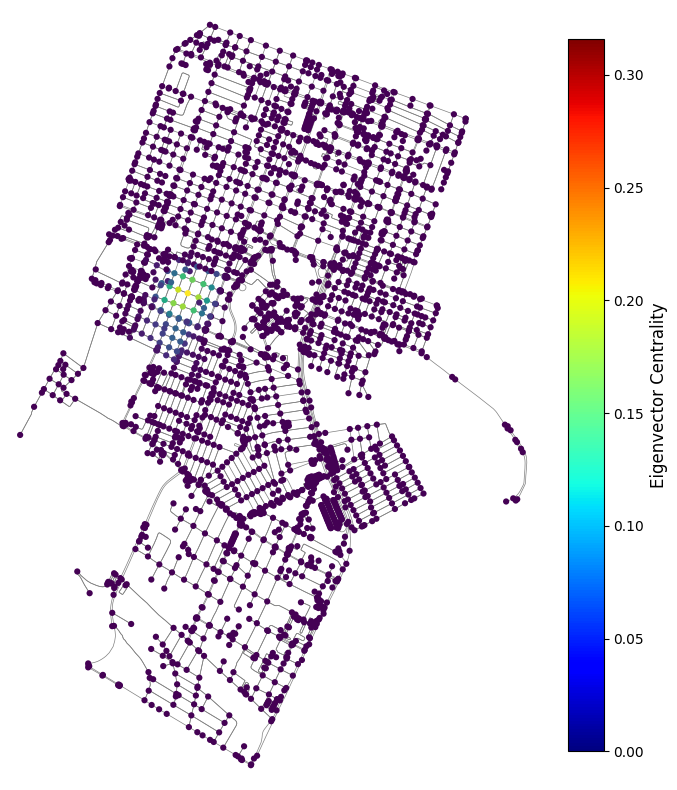

In [17]:
eigenvector_dict = nx.eigenvector_centrality_numpy(G, max_iter=1000)
node_colors = [eigenvector_dict[node] for node in G.nodes()]

# Define a figura e os eixos para o grafo com coloração baseada na centralidade de vetor próprio
fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="gray",
    bgcolor="white",
    show=False,
    close=False,
    figsize=(10, 10)
)

# Define um ScalarMappable para a barra de cores usando o mesmo cmap "jet"
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessário para o ScalarMappable

# Adiciona a barra de cores à visualização
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label('Eigenvector Centrality', fontsize=12)

plt.savefig('./imgs/eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

## REQUISITO 2

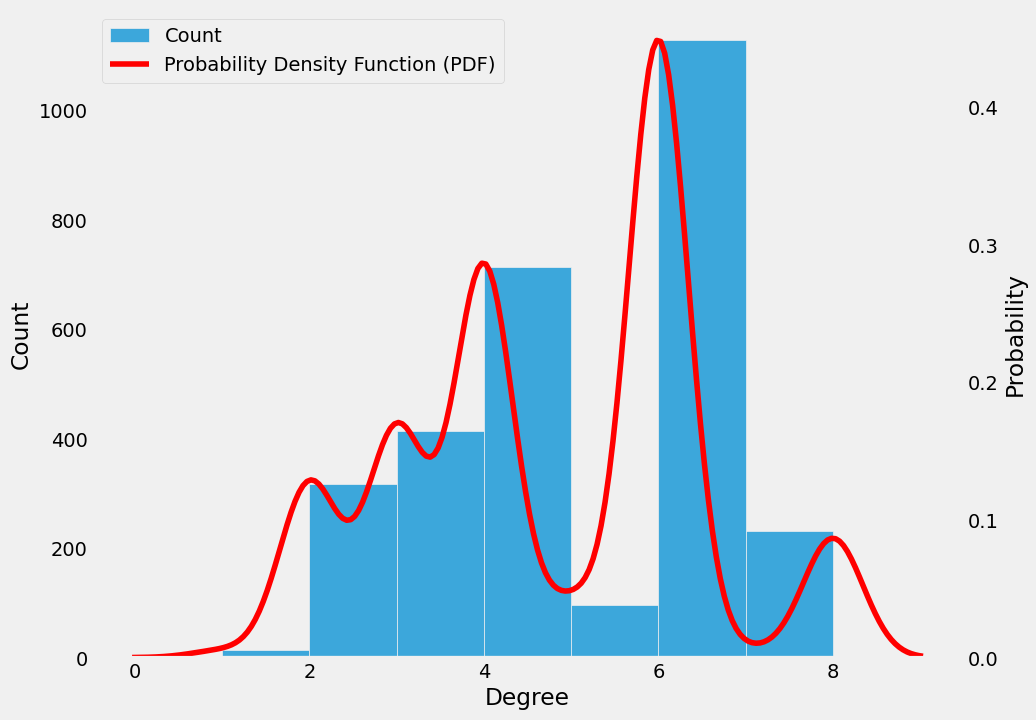

In [19]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('./imgs/probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

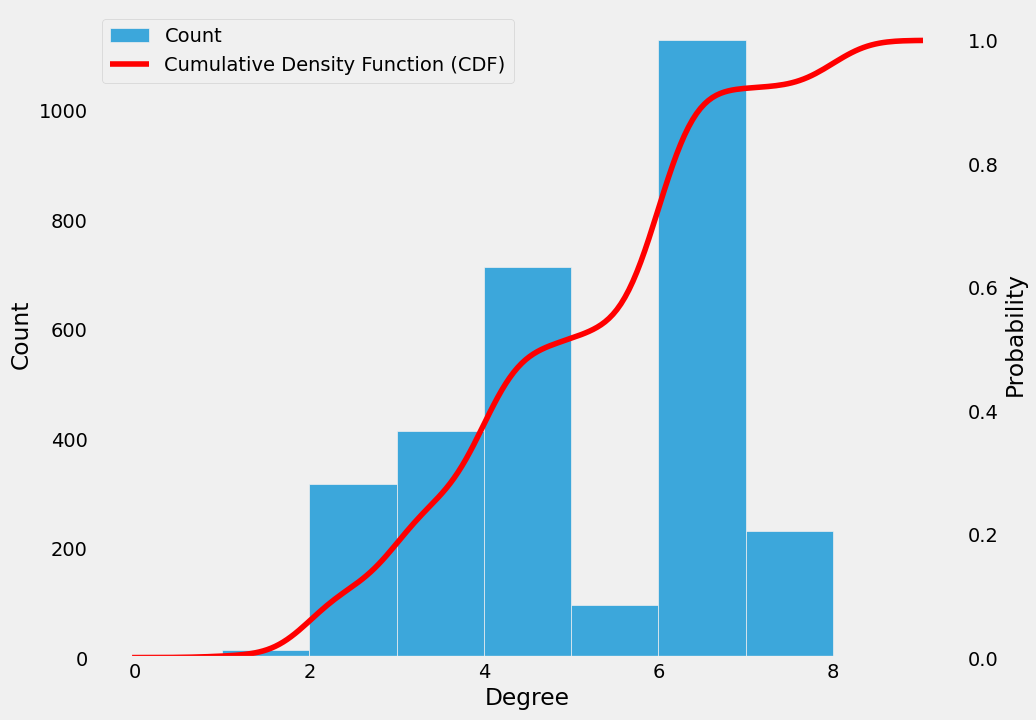

In [20]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('./imgs/cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## REQUSITO 3

In [46]:
bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))
ec = pd.Series(nx.eigenvector_centrality_numpy(G, max_iter=1000))
cc = pd.Series(nx.closeness_centrality(G))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.108656,0.001030,6.254833e-10,0.034112
1,0.000000,0.000343,-2.080935e-21,0.000000
2,0.004254,0.002060,2.545727e-07,0.027474
3,0.010045,0.002060,8.628640e-07,0.028936
4,0.024594,0.001030,5.643744e-08,0.036863


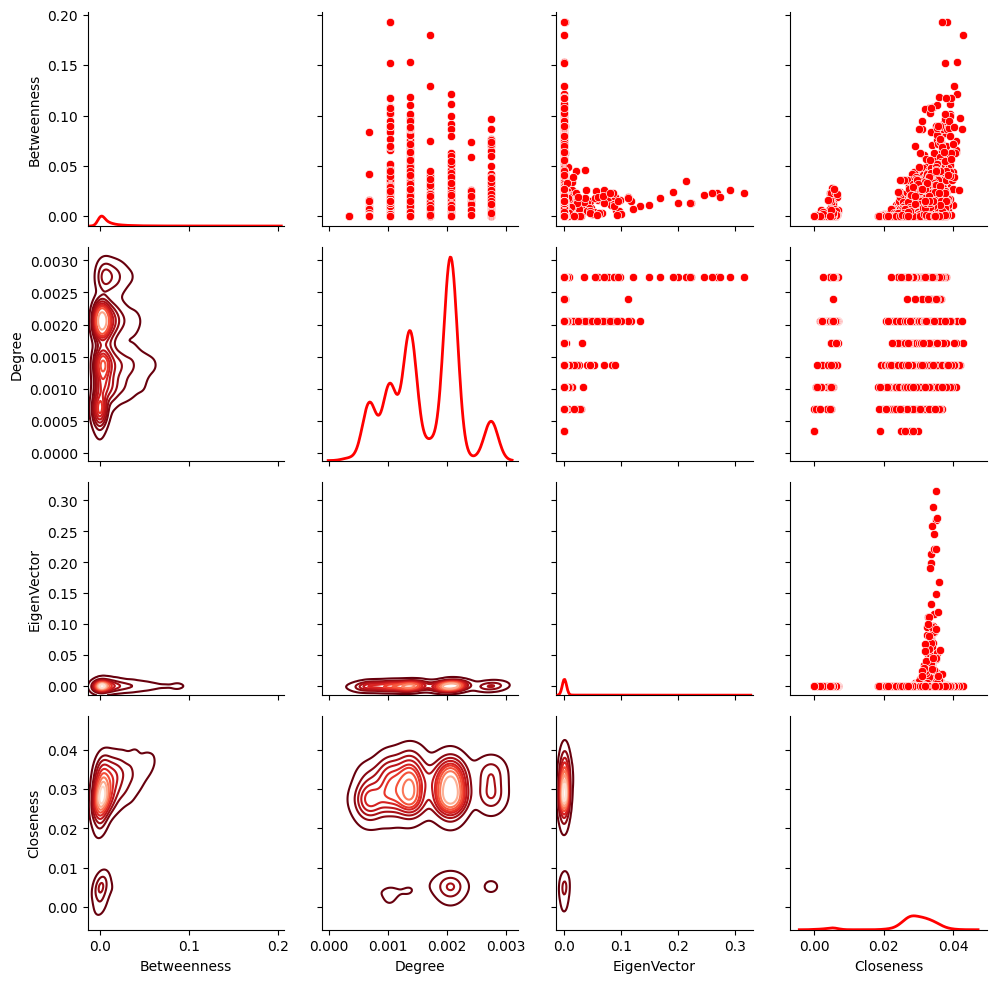

In [52]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot, color='red')
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False, color='red')

plt.savefig('./imgs/all_centrality.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

## REQUISITO 4

In [5]:
# Convert the multigraph to a simple graph
G_simple = nx.Graph(G)
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# Calculate the core numbers for the simple graph
core_numbers = nx.core_number(G_simple)

# Get the unique core numbers
set(core_numbers.values())

{1, 2}

In [40]:
print(G.number_of_edges())
print(G_simple.number_of_edges())

6915
4259


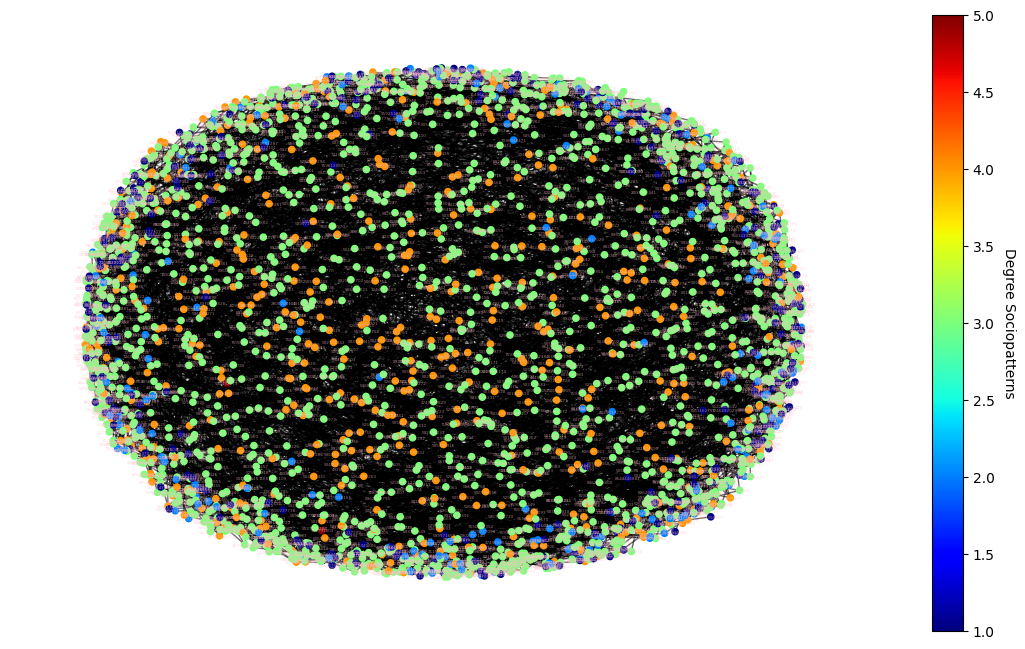

In [42]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(14,8))

# layout position
pos = nx.spring_layout(G_simple,seed=123456789,k=0.4)
# color of nodes
color = list(dict(nx.degree(G_simple)).values())

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       alpha=0.6, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet, node_size=20, ax=ax)

# draw labels
nx.draw_networkx_labels(G_simple, pos=pos,
                        font_color='pink', font_size=3, alpha=0.6, ax=ax)

# Criando um ScalarMappable para a colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(color), vmax=max(color)))
sm.set_array([])  # Necessário para evitar erros com o ScalarMappable

# Adicionando a barra de cores
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Degree Sociopatterns', rotation=270, labelpad=15)


plt.axis("off")
plt.savefig('./imgs/sociopatterns.png', transparent=True,dpi=600)
plt.show()

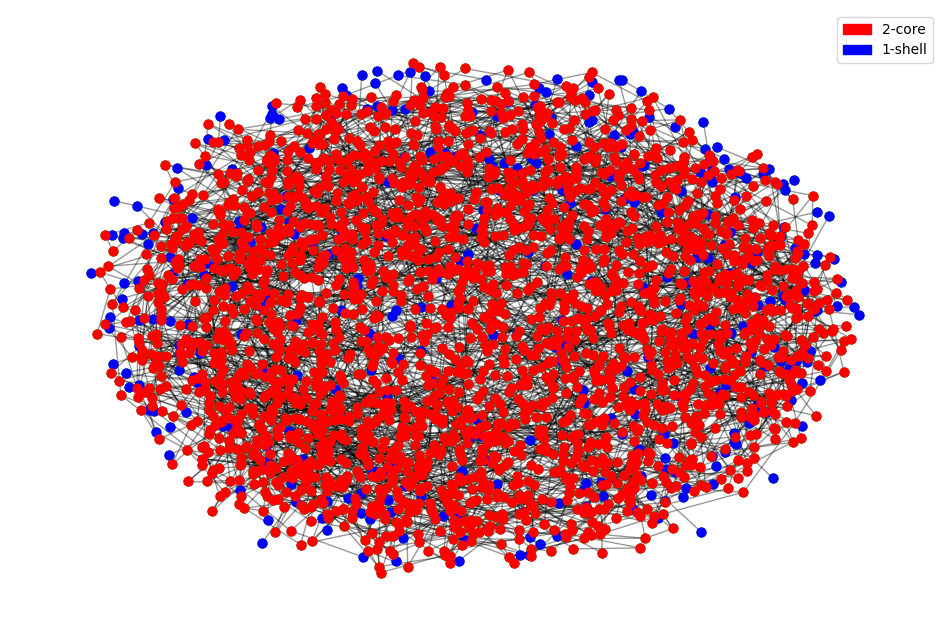

In [44]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Find k-cores
Gsimple_core_1 = nx.k_shell(G_simple, 1)
Gsimple_core_2 = nx.k_core(G_simple, 2)

# layout position
pos = nx.spring_layout(G_simple,seed=123456789,k=0.1)

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color="green", node_size=40)

# draw nodes
nodes = nx.draw_networkx_nodes(Gsimple_core_1,
                 pos=pos,
                 node_color="blue", node_size=40)

nodes = nx.draw_networkx_nodes(Gsimple_core_2,
                 pos=pos,
                 node_color="red", node_size=40)

# static legend
red_patch = mpatches.Patch(color='red', label='2-core')
blue_patch = mpatches.Patch(color='blue', label='1-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('./imgs/k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()
     